# Predicting Student Exam Scores Using Machine Learning
----

This project focuses on predicting students’ exam scores using **supervised machine learning** based on academic, lifestyle, and behavioral factors. The dataset includes features such as study hours, attendance, sleep quality, internet access, and learning methods. After performing detailed data preprocessing, feature encoding, scaling, and visualization, a **Random Forest Regressor** is trained to achieve high prediction accuracy. This project demonstrates a complete end-to-end ML pipeline.

**Objective**:
* Understand factors affecting exam scores
* Apply full data preprocessing
* Train a regression model
* Evaluate performance
* Interpret features

## Table of Content 
1. [Loading Libraries](#loading-libraries)
2. [Loading Dataset](#loading-dataset)
3. [Data Understanding & Basic EDA](#data-understanding-eda)
4. [Visualization](#visualization)
5. [Applying Base Model](#applying-base-model-linear-regression)
6. [Applying Final Model](#applying-final-model-random-forest-algorithm)
7. [Final Results](#final-result)

### Loading Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


### Loading dataset


In [2]:
df = pd.read_csv("Exam_Score_Prediction.csv")
df.head()


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


### Data understanding (EDA) - Data Cleaning 
----
it inlcudes several steps like  
* Check for missing values
* Fill or remove missing values
* Remove duplicates
* Fix inconsistent text values
* Convert categorical columns to encoded values

In [ ]:
# to check number of rows* coloumns
df.shape

(20000, 13)

In [ ]:
# overall summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [6]:
# stastical summary 
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


#### handling missing values (if any)
This checks if any column has empty values.


In [8]:
df.isnull().sum()



student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

#### Remove duplicates

In [3]:
df = df.drop_duplicates()


#### Fix inconsistent text values
Example:
"male", "Male", "MALE" should be same.

In [4]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()


#### categorical encoding
Label Encoding is used to transform categorical variables into numerical form so that machine learning algorithms can interpret them. Each category is replaced with a unique integer value. This step is essential because most ML models operate only on numerical inputs. In this dataset, features such as gender, course, study method, sleep quality, and internet access were encoded using this approach.

Machine learning models cannot directly process text values such as:
* gender → male, female, other
* course → b.tech, bca, diploma
* study_method → coaching, self-study
* internet_access → yes, no

These are categorical features, and ML algorithms only work with numerical data.So we convert text categories into numeric labels using Label Encoding.
**They work like this **
| Original Category | Encoded Value |
| ----------------- | ------------- |
| male              | 0             |
| female            | 1             |
| other             | 2             |



Twe're creating a separate LabelEncoder for each categorical column so that every column gets its own correct mapping. T
he loop finds all object (text) columns and encodes them one by one. 
Each encoder is stored in a dictionary so you can convert numbers back to original text later. This avoids mixing categories from different columns and keeps your data clean and accurate

In [1]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le   


NameError: name 'df' is not defined

#### splitting into features and target coloumn


In [12]:
X = df.drop("exam_score", axis=1)  #features
y = df["exam_score"]  # target 

### Data Balancing

**Balancing is needed only if the target is classification. but our target is exam_score → numeric → regression problem**
So balancing is NOT required normally. But if you want to convert exam_score into categories, you can do:

Example categories:

* Low (0–50)
* Medium (50–75)
* High (75–100)

----
**Data Balance**: When your target column (y) has unequal number of classes, for example:
Class | count
------- | ------- 
Yes | 900
No | 100

This is called imbalanced data.

Balancing means making all classes have similar number of samples, for example:

Class | Count
------|------
Yes | 900
No | 900

-------
### How to Balance Data?

There are two common methods:

🔹 Method 1: Oversampling (Add more minority samples) Most popular technique → SMOTE (Synthetic Minority Oversampling Technique).
🔹 Method 2: Undersampling (Remove extra majority samples)



### Impacts of Data Balancing?
**Benefits**
* Model becomes fair and learns from all classes.
* Better recall, precision, F1-score for minority class.
* Avoids problem of model predicting only the majority class.
* More meaningful predictions in real-life usage.

**Possible disadvantages**

* Oversampling may cause overfitting (SMOTE reduces this problem).
* Undersampling removes data → loss of information.
* Processing time increases slightly.




#### feature scaling

Feature scaling ensures that all numerical features contribute equally to model training. Since the dataset contains features with significantly different ranges (such as attendance percentage and study hours), StandardScaler is applied to normalize them. This prevents the model from being biased toward features with larger magnitudes and improves overall learning stability and performance.

Feature Scaling Is Important as our dataset has very different value ranges:

Feature | Example Range
--------|--------------
study_hours | 0.6 – 8.0
attendance | 40 – 95
exam_score | 30 – 90
sleep_hours | 4 – 10

If scaling is not applied:

* Large values dominate small ones
* Distance-based models perform poorly
* Training becomes unstable

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


#### splitting into training & testing

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Visualization 

#### Histogram 
Exam Score Distribution (Histogram)
**Why chosen**:
> To see whether exam scores are normally distributed or skewed.

This visualization shows the overall distribution of exam scores among students. It helps identify the general performance trend, detect skewness, and understand the range of marks before applying regression models.


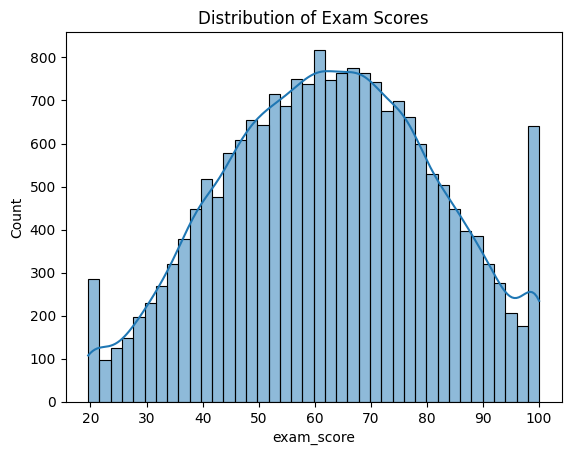

In [16]:
plt.figure()
sns.histplot(df["exam_score"], kde=True)
plt.title("Distribution of Exam Scores")
plt.show()

#### Correlation Heatmap

**Why chosen**:
> To analyze relationships between input features and the target variable.

It reflects:
* Which features are strongly related to exam_score
* Redundant features
* Multicollinearity detection

The correlation heatmap highlights how strongly each feature is related to the exam score. This helps in understanding which variables influence student performance the most and assists in effective feature selection.

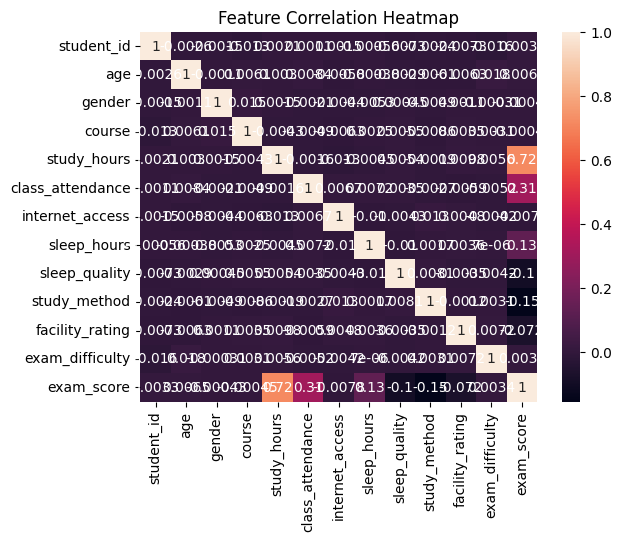

In [17]:
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Scatter Plot
This is the most logical academic relationship.
It reflects:

* Whether increased study hours improve scores
* Trend direction (positive correlation)
* Learning behavior impact

> This plot visualizes the direct relationship between study hours and exam performance. A positive upward trend indicates that students who study more generally achieve higher scores.

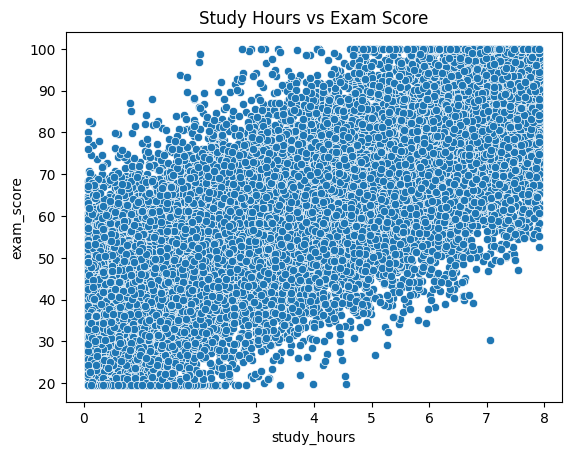

In [20]:
plt.figure()
sns.scatterplot(x=df["study_hours"], y=df["exam_score"])
plt.title("Study Hours vs Exam Score")
plt.show()

#### Pairplot

**Why chosen**:
> Multi-variable relationship analysis.

It reflects:
* Combined interactions between multiple features
* Outlier detection
* General data behavior

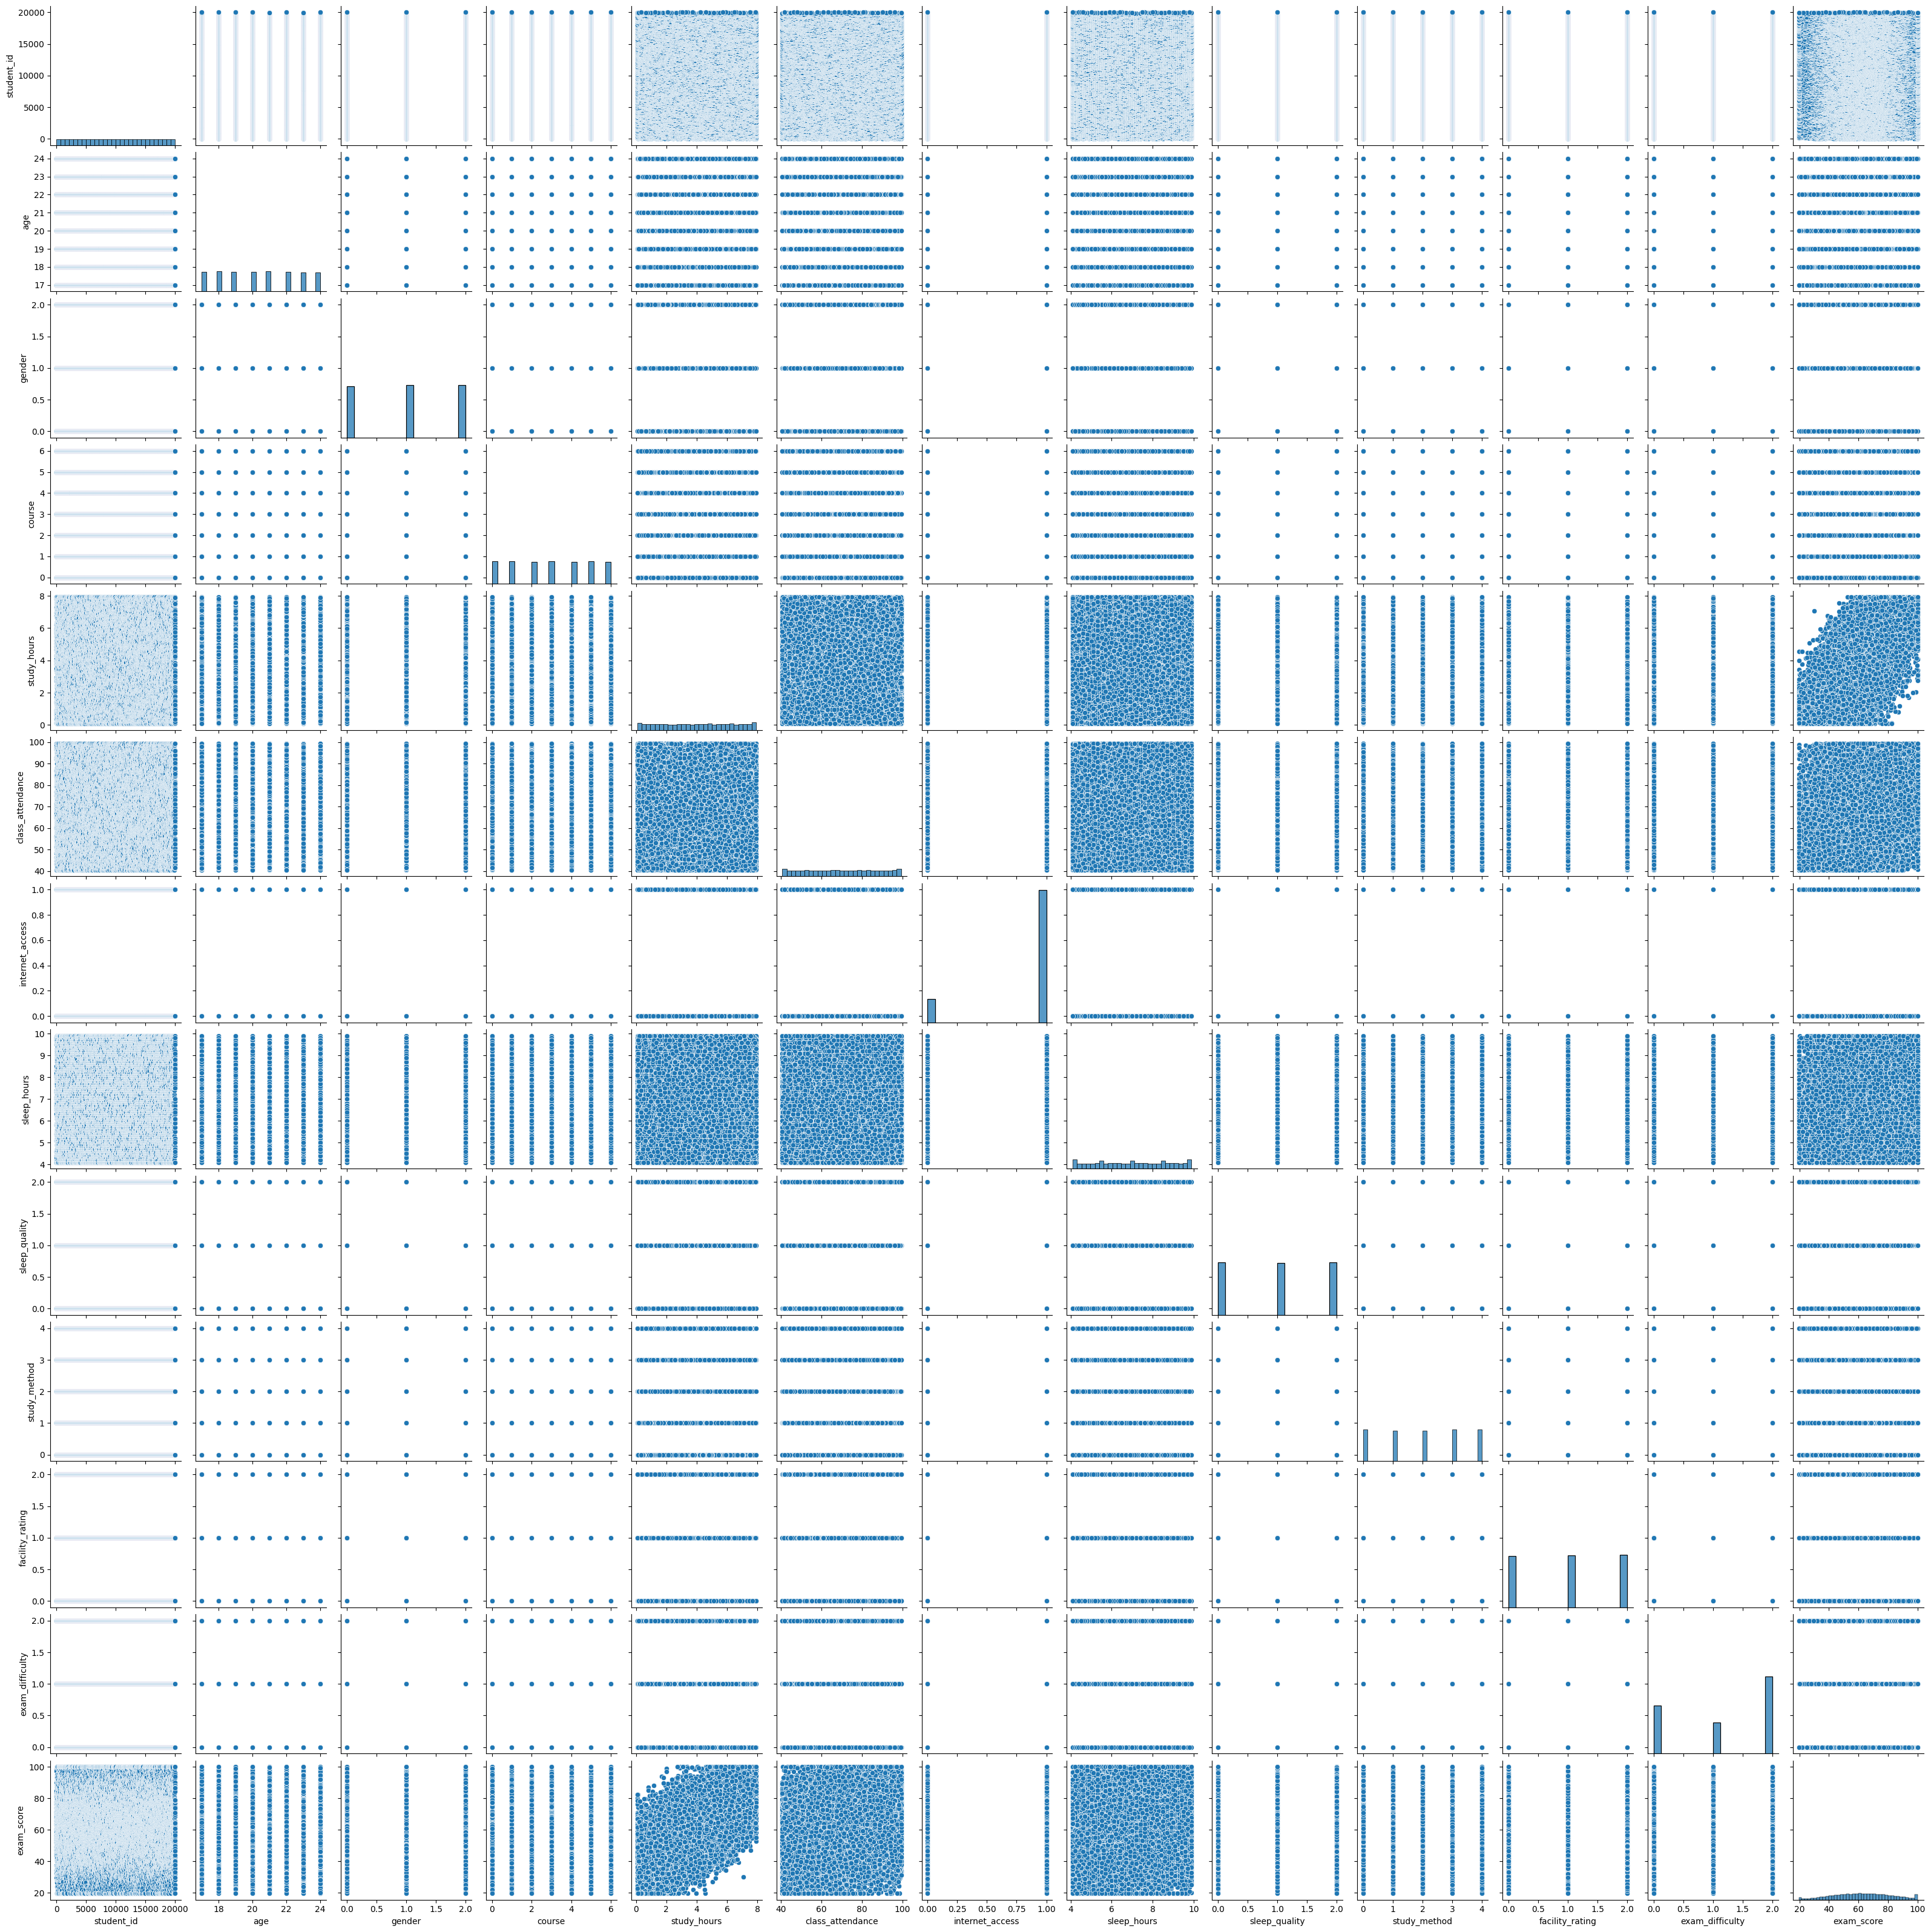

In [21]:
sns.pairplot(df)


#### Box plot
Gender vs Exam Score (Boxplot)
> Performance difference between genders

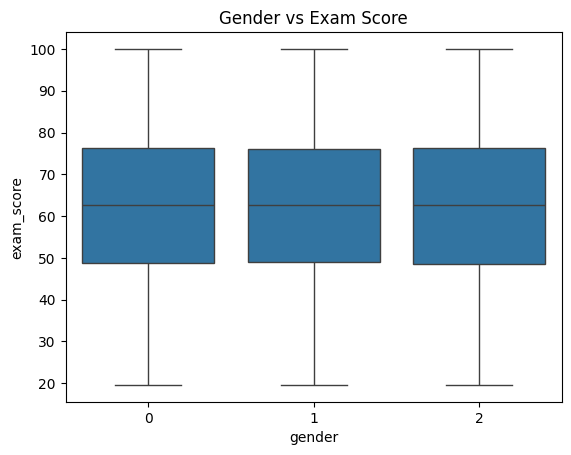

In [26]:
sns.boxplot(x="gender", y="exam_score", data=df)
plt.title("Gender vs Exam Score")
plt.show()


### Bar Plot 
Internet Access vs Exam Score
>  Shows effect of digital access on learning outcomes.

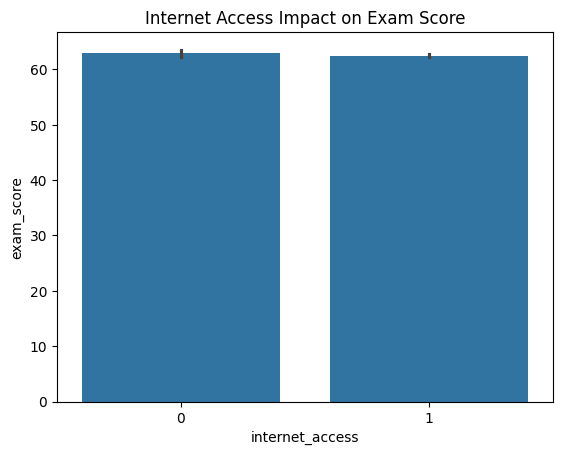

In [27]:
sns.barplot(x="internet_access", y="exam_score", data=df)
plt.title("Internet Access Impact on Exam Score")
plt.show()


### Applying Base Model (Linear Regression)


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, lr_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("R2:", r2_score(y_test, lr_preds))


MAE: 8.800926454747175
RMSE: 10.906812780510986
R2: 0.6674320469490582


### Applying Final Model (Random Forest Algorithm) 

In [23]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, rf_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R2:", r2_score(y_test, rf_preds))


MAE: 8.397851103908815
RMSE: 10.381322986721079
R2: 0.6987062749050096


### Final Result

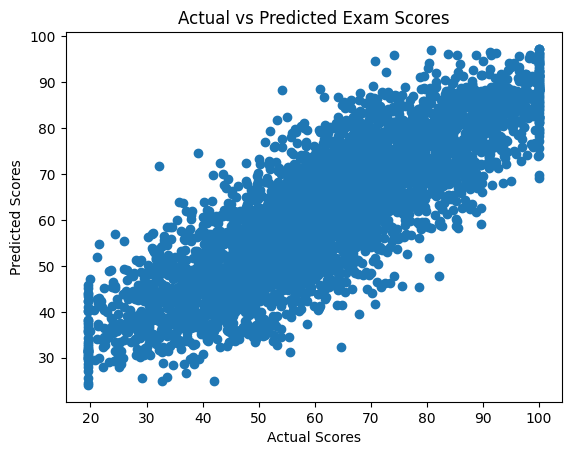

In [25]:
plt.figure()
plt.scatter(y_test, rf_preds)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


### Evaluation Metrics

**MAE (Mean Absolute Error):**
Average number of marks the model’s prediction is off by.
> Lower MAE = better accuracy.

**RMSE (Root Mean Squared Error):**
Measures how large the prediction errors are, with extra penalty for big mistakes.
> Lower RMSE = more stable model.

**R² Score:**
Shows how well the model explains the data (range 0 to 1).
>  Higher R² = better fit.

### Confusion matrix

This is a simple table used to measure how well a classification model is performing. It compares the predictions made by the model with the actual results and shows where the model was right or wrong. This helps you understand where the model is making mistakes so you can improve it. It breaks down the predictions into four categories:

True Positive (TP): The model correctly predicted a positive outcome i.e the actual outcome was positive.
True Negative (TN): The model correctly predicted a negative outcome i.e the actual outcome was negative.
False Positive (FP): The model incorrectly predicted a positive outcome i.e the actual outcome was negative. It is also known as a Type I error.
False Negative (FN): The model incorrectly predicted a negative outcome i.e the actual outcome was positive. It is also known as a Type II error.

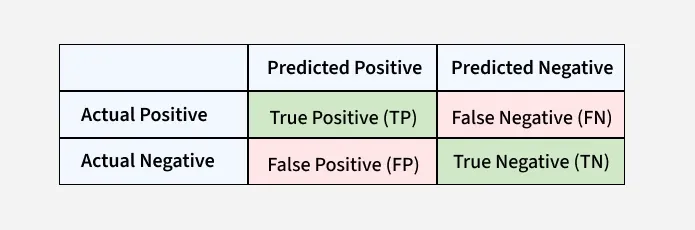

The **Linear Regression model** predicts exam scores with an average error of about 9 marks and explains nearly 67% of the variation in student performance.
The **Random Forest model** gives better accuracy with lower error and explains about 70% of the variation in exam scores.

**A confusion matrix is only for classification, not regression.**
Your models (LinearRegression and RandomForestRegressor) are regression models, so a confusion matrix cannot be applied directly.

Use regression evaluation metrics (recommended)
Regression uses:
* MAE (Mean Absolute Error)
* MSE / RMSE
* R² Score
* MAPE

| **Metric**   | **Full Name**                | **What It Means**                                                                    | **Good Value?**  |
| ------------ | ---------------------------- | ------------------------------------------------------------------------------------------------------- | ---------------- |
| **MAE**      | Mean Absolute Error          | Shows how much your predictions are wrong **on average**. Example: MAE = 5 means you're off by 5 units. | Lower is better  |
| **MSE**      | Mean Squared Error           | Squares the errors, so **big mistakes are punished more heavily**. Helps catch large errors.            | Lower is better  |
| **RMSE**     | Root Mean Squared Error      | Square root of MSE, so the error is in **original units** of the target variable. Easier to understand. | Lower is better  |
| **R² Score** | Coefficient of Determination | Shows how well the model fits the data. **1 = perfect**, 0 = no learning, negative = very bad.          | Higher is better |

